### Exploratory Data Analysis (&) Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Load datasets
anime_df = pd.read_csv('../data/raw/anime.csv')
top_anime_df = pd.read_csv('../data/raw/top_15000_anime.csv')


In [3]:
# Display first few rows of the datasets
print("Anime Dataset:")
print(anime_df.head())
print("\nTop 15000 Anime Dataset:")
print(top_anime_df.head())

Anime Dataset:
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  

Top 15000 Anime Dataset:
   anime_id                                          anime_url  \
0     52991  https://myanimelist.net/an

### Cleaning

In [4]:
anime_df.info()
top_anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        15000 non-null  int64  
 1   anime_url       15000 non-null  object 
 2   image_url       15000 non-null  object 
 3   name            15000 non-null  object 
 4   english_name    8748 non-null   object 
 5   japanese_names  14966 non-null  object 
 6   sco

In [5]:

extra_cols = [col for col in top_anime_df.columns if col not in anime_df.columns and col != 'title']
top_anime_trimmed = top_anime_df[['anime_id'] + extra_cols]

### Merge Datasets
combined_anime_df = pd.merge(anime_df, top_anime_trimmed, on='anime_id', how='outer')


In [6]:
combined_anime_df.to_csv('../data/processed/combined_anime.csv', index=False)

### Data Wrangling

In [7]:
### Dropping unecessary columns
drop_cols = ['japanese_names', 'synopsis', 'anime_url', 'image_url', 'english_name', 'rank', 'scored_by', 'genres']

combined_anime_df = combined_anime_df.drop(columns=drop_cols)

In [8]:
### Find the percentage of missing values in each column
missing_percentage = f"{round((combined_anime_df.isnull().sum()/ len(combined_anime_df)) * 100, 4)}%"
print(missing_percentage)

anime_id         0.0000
name            30.4992
genre           30.8497
type            30.6405
episodes        30.4992
rating          31.7994
members         30.4992
score           15.2015
themes          48.1825
demographics    73.8877
premiered       71.6660
producers       43.8634
studios         25.1173
source          15.2015
duration        15.2015
popularity      15.2015
favorites       15.2015
dtype: float64%


In [9]:
combined_anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17689 entries, 0 to 17688
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      17689 non-null  int64  
 1   name          12294 non-null  object 
 2   genre         12232 non-null  object 
 3   type          12269 non-null  object 
 4   episodes      12294 non-null  object 
 5   rating        12064 non-null  float64
 6   members       12294 non-null  float64
 7   score         15000 non-null  float64
 8   themes        9166 non-null   object 
 9   demographics  4619 non-null   object 
 10  premiered     5012 non-null   object 
 11  producers     9930 non-null   object 
 12  studios       13246 non-null  object 
 13  source        15000 non-null  object 
 14  duration      15000 non-null  object 
 15  popularity    15000 non-null  float64
 16  favorites     15000 non-null  float64
dtypes: float64(5), int64(1), object(11)
memory usage: 2.3+ MB


### Observations

### Values that we can't impute
| Column       | % Missing | Notes / Action                                                         |
| ------------ | --------- | ---------------------------------------------------------------------- |
| anime_id     | 0.00      | No missing values ✅                                                    |
| name         | 30.50     | Cannot impute; unique identifier, keep as is or drop for modeling      |
| genre        | 30.85     | Cannot impute; categorical, consider dropping or treating as “unknown” |
| type         | 30.64     | Cannot impute; categorical                                             |
| episodes     | 30.50     | Cannot impute; numeric, maybe drop or encode with caution              |
| rating       | 31.80     | Can impute (mean/median) if desired                                    |
| members      | 30.50     | Can impute or leave as is depending on modeling                        |
| score        | 15.20     | Can impute (mean/median)                                               |
| themes       | 48.18     | Cannot impute; categorical, consider dropping                          |
| demographics | 73.89     | Cannot impute; drop                                                    |
| premiered    | 71.67     | Cannot impute; drop                                                    |
| producers    | 43.86     | Dropped due to too many missing values                                 |
| studios      | 25.12     | Could impute “unknown” or drop                                         |
| source       | 15.20     | Can't impute ("Unkown)                                                                                                              |
| duration     | 15.20     | Can impute (mean/median)                                               |
| popularity   | 15.20     | Can impute (mean/median)                                               |
| favorites    | 15.20     | Can impute (mean/median)                                               |


In [10]:
combined_anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17689 entries, 0 to 17688
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      17689 non-null  int64  
 1   name          12294 non-null  object 
 2   genre         12232 non-null  object 
 3   type          12269 non-null  object 
 4   episodes      12294 non-null  object 
 5   rating        12064 non-null  float64
 6   members       12294 non-null  float64
 7   score         15000 non-null  float64
 8   themes        9166 non-null   object 
 9   demographics  4619 non-null   object 
 10  premiered     5012 non-null   object 
 11  producers     9930 non-null   object 
 12  studios       13246 non-null  object 
 13  source        15000 non-null  object 
 14  duration      15000 non-null  object 
 15  popularity    15000 non-null  float64
 16  favorites     15000 non-null  float64
dtypes: float64(5), int64(1), object(11)
memory usage: 2.3+ MB


### Insights
Based on the proportion of missing values, for the columns: these columns would probably to need be dropped or marked as NAN's

- Demographics (NAN) => Going to keep it that way, (Important)
- Premiered (Dropped) => In the grand scheme of things not that important
- Producers (Debating) => Can't really impute this variable because each would have different producers, and imputing them introduce great bias towards a certain producer.

In [11]:
combined_anime_df['demographics'].head(15)

0         NaN
1         NaN
2     Shounen
3         NaN
4     Shounen
5     Shounen
6       Josei
7     Shounen
8      Seinen
9      Seinen
10    Shounen
11    Shounen
12    Shounen
13    Shounen
14    Shounen
Name: demographics, dtype: object

In [12]:
combined_anime_df = combined_anime_df.rename(columns={"duration": "duration(mins)"})

In [13]:
## Dropping priemered column due to high missing values
combined_anime_df = combined_anime_df.drop(columns=['premiered'])

In [14]:
## Remove non-digits in duration
combined_anime_df['duration(mins)'] = combined_anime_df['duration(mins)'].str.replace(r"\D", "", regex=True)
combined_anime_df['duration(mins)'] = combined_anime_df['duration(mins)'].replace("", np.nan)
combined_anime_df['duration(mins)'] = combined_anime_df['duration(mins)'].astype(float).astype('Int64')

In [15]:
## Convert the misidentified type
combined_anime_df['episodes'] = combined_anime_df['episodes'].replace("Unknown", 0)
combined_anime_df['episodes'] = pd.to_numeric(
    combined_anime_df['episodes'], errors='coerce'
).fillna(0).astype('Int64')  # Nullable integer


In [16]:
combined_anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17689 entries, 0 to 17688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        17689 non-null  int64  
 1   name            12294 non-null  object 
 2   genre           12232 non-null  object 
 3   type            12269 non-null  object 
 4   episodes        17689 non-null  Int64  
 5   rating          12064 non-null  float64
 6   members         12294 non-null  float64
 7   score           15000 non-null  float64
 8   themes          9166 non-null   object 
 9   demographics    4619 non-null   object 
 10  producers       9930 non-null   object 
 11  studios         13246 non-null  object 
 12  source          15000 non-null  object 
 13  duration(mins)  14977 non-null  Int64  
 14  popularity      15000 non-null  float64
 15  favorites       15000 non-null  float64
dtypes: Int64(2), float64(5), int64(1), object(8)
memory usage: 2.2+ MB


### Visualizations

Response Variable: (rating or score) 

- **Note:** Score and rating are about the same, dropping one, since in this case we are predicting rating removing score column.
- Rating looks to be a weighted score, meaning it probably takes into account of different factors like the number of users who rated the show and other metrics as emphasized by the correlation below:

In [17]:
## Checking correlation between score and rating
correlation = combined_anime_df[['score', 'rating']].corr()
print(correlation)

           score    rating
score   1.000000  0.924838
rating  0.924838  1.000000


In [18]:
combined_anime_df.drop(columns=['score'], inplace=True)

#### Response Variable

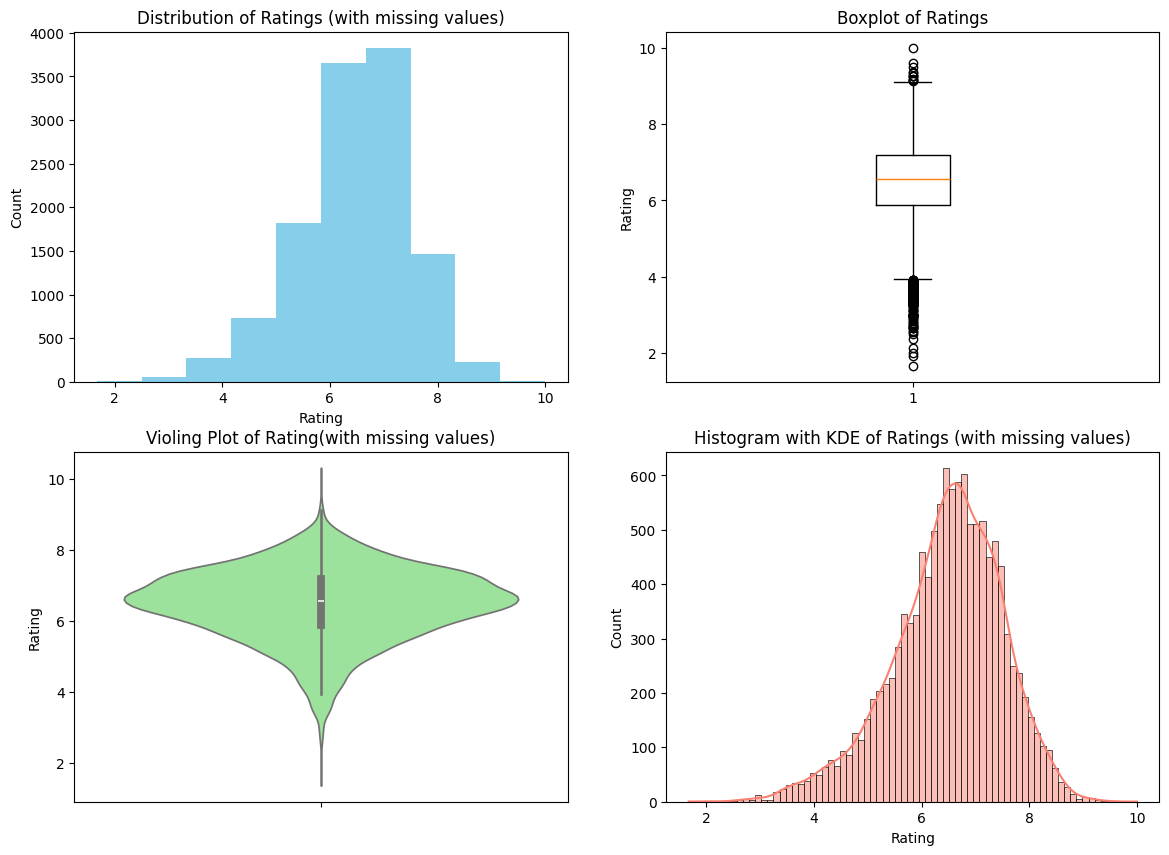

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs[0,0].hist(combined_anime_df['rating'], color='skyblue')
axs[0,0].set_title('Distribution of Ratings (with missing values)')
axs[0,0].set_xlabel('Rating')
axs[0,0].set_ylabel('Count')
axs[0,1].boxplot(combined_anime_df['rating'].dropna(), vert=True)
axs[0,1].set_title('Boxplot of Ratings')
axs[0,1].set_ylabel('Rating')
sns.violinplot(y=combined_anime_df['rating'], ax=axs[1,0], color='lightgreen')
axs[1,0].set_title('Violing Plot of Rating(with missing values)')
axs[1,0].set_ylabel('Rating')
sns.histplot(combined_anime_df['rating'], kde=True, ax=axs[1,1], color='salmon')
axs[1,1].set_title('Histogram with KDE of Ratings (with missing values)')
axs[1,1].set_xlabel('Rating')
plt.show()

#### Features

Same graphs for all the features.

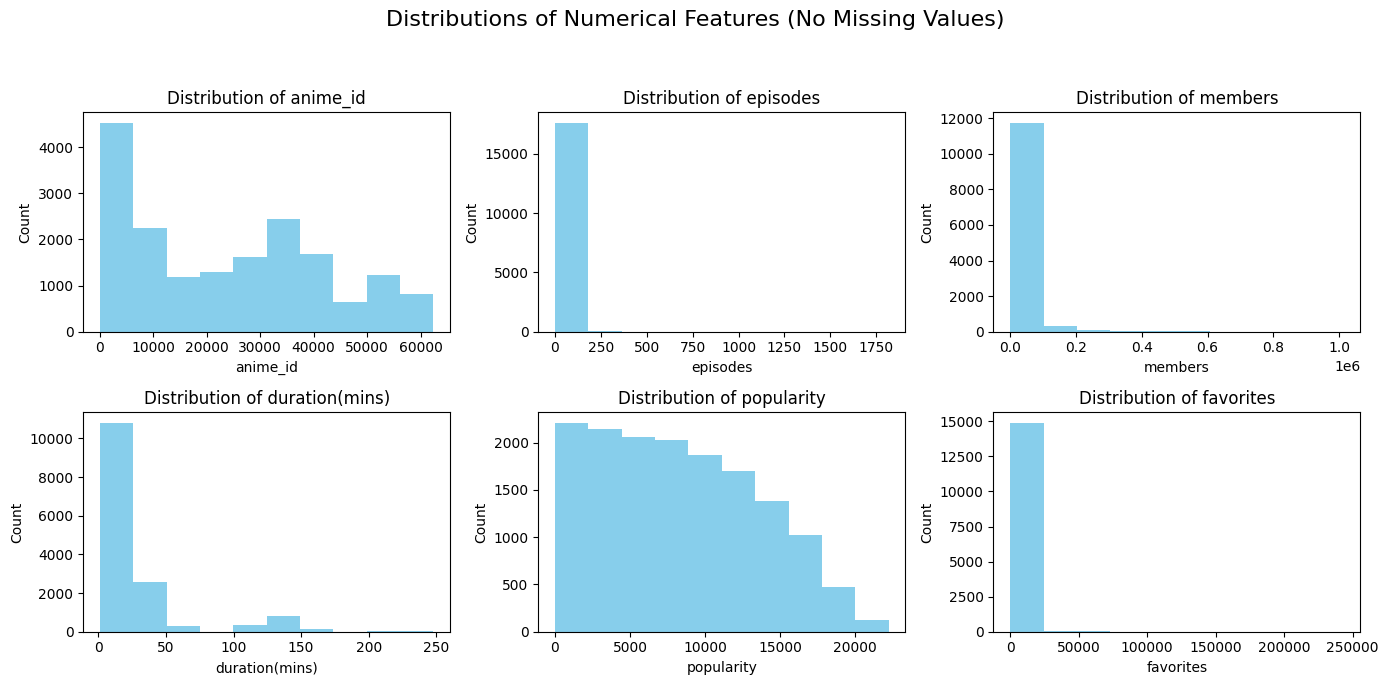

In [20]:
## Plotting the same plots for input features
num_cols = combined_anime_df.select_dtypes(include='number').columns
num_cols = num_cols.drop('rating')

n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axs = plt.subplots(n_rows,n_cols, figsize=(14,5 * n_rows))
fig.suptitle('Distributions of Numerical Features (No Missing Values)', fontsize=16)

axs = np.ravel(axs)

for i, col in enumerate(num_cols):
    axs[i].hist(combined_anime_df[col].dropna(), color='skyblue')
    axs[i].set_title(f"Distribution of {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')

for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout(rect=[0,0.3,1,0.95])
plt.show()

    

In [21]:
###Checking for numeric missing values
missing_numeric_percent = (combined_anime_df.select_dtypes(include='number').isnull().sum() / len(combined_anime_df)) * 100
print(missing_numeric_percent)

anime_id           0.000000
episodes           0.000000
rating            31.799423
members           30.499180
duration(mins)    15.331562
popularity        15.201538
favorites         15.201538
dtype: float64


## Data Imputation & Catergorical Encoding

In [22]:
combined_anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17689 entries, 0 to 17688
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        17689 non-null  int64  
 1   name            12294 non-null  object 
 2   genre           12232 non-null  object 
 3   type            12269 non-null  object 
 4   episodes        17689 non-null  Int64  
 5   rating          12064 non-null  float64
 6   members         12294 non-null  float64
 7   themes          9166 non-null   object 
 8   demographics    4619 non-null   object 
 9   producers       9930 non-null   object 
 10  studios         13246 non-null  object 
 11  source          15000 non-null  object 
 12  duration(mins)  14977 non-null  Int64  
 13  popularity      15000 non-null  float64
 14  favorites       15000 non-null  float64
dtypes: Int64(2), float64(4), int64(1), object(8)
memory usage: 2.1+ MB


### Correcting Datatypes for imputation and categorical encoding

In [23]:
cols = combined_anime_df.select_dtypes(include='object').columns

# Normalize: turn object/None/empty into real NaN first, then fill
combined_anime_df[cols] = combined_anime_df[cols].replace(['', 'None', 'none', 'NaN'], np.nan)
combined_anime_df[cols] = combined_anime_df[cols].fillna('Unknown')

# Optionally convert to pandas category
combined_anime_df[cols] = combined_anime_df[cols].astype('category')

In [24]:
combined_anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17689 entries, 0 to 17688
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   anime_id        17689 non-null  int64   
 1   name            17689 non-null  category
 2   genre           17689 non-null  category
 3   type            17689 non-null  category
 4   episodes        17689 non-null  Int64   
 5   rating          12064 non-null  float64 
 6   members         12294 non-null  float64 
 7   themes          17689 non-null  category
 8   demographics    17689 non-null  category
 9   producers       17689 non-null  category
 10  studios         17689 non-null  category
 11  source          17689 non-null  category
 12  duration(mins)  14977 non-null  Int64   
 13  popularity      15000 non-null  float64 
 14  favorites       15000 non-null  float64 
dtypes: Int64(2), category(8), float64(4), int64(1)
memory usage: 1.9 MB


#### Imputation Method (KNN Imputer)

- KNN => K nearest neighbor
- Replaces missing values with the average of k nearest neighbors
- Pros
    - Non-parametric, does not assume linear relationships
    - Preserves local structure, less bias
- Cons:
    - Sensitive to scaling -> needs all numeric values to be standardized
    - Need split to trianing/testing set to prevent data leakage

- Need to impute the target columns since most models can't handle null values, in the target column.


### Splitting Dataset (Train/Test) Split

In [25]:
from sklearn.model_selection import train_test_split
### Splitting Data
train_df, test_df = train_test_split(
    combined_anime_df,
    test_size = 0.2,
    random_state= 42,
    shuffle=True
)
print("="*60)
print("TRAIN/TEST SPLIT COMPLETE")
print("="*60)
print(f"Training set: {len(train_df):,} rows ({len(train_df)/len(combined_anime_df)*100:.1f}%)")
print(f"Test set: {len(test_df):,} rows ({len(test_df)/len(combined_anime_df)*100:.1f}%)")
print("\n✓ Split complete - Now we can do statistical operations safely!")

TRAIN/TEST SPLIT COMPLETE
Training set: 14,151 rows (80.0%)
Test set: 3,538 rows (20.0%)

✓ Split complete - Now we can do statistical operations safely!


### Separting columns for imputation

In [26]:
numeric_cols = train_df.select_dtypes(include='number').columns.tolist()
print(f"Numerical columns to impute: {numeric_cols}")
print("\nMissing values in TRAIN:")
print(train_df[numeric_cols].isnull().sum())
print("\nMissing values in TEST:")
print(test_df[numeric_cols].isnull().sum())

Numerical columns to impute: ['anime_id', 'episodes', 'rating', 'members', 'duration(mins)', 'popularity', 'favorites']

Missing values in TRAIN:
anime_id             0
episodes             0
rating            4490
members           4309
duration(mins)    2176
popularity        2156
favorites         2156
dtype: int64

Missing values in TEST:
anime_id             0
episodes             0
rating            1135
members           1086
duration(mins)     536
popularity         533
favorites          533
dtype: int64


### Standard Scaler

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(train_df[numeric_cols])

print("StandardScaler fitted on TRAINING data")
print("\nLearned means (from train):")
for col, mean in zip(numeric_cols, scaler.mean_):
    print(f"  {col}: {mean:.2f}")
    
train_scaled = scaler.transform(train_df[numeric_cols])
test_scaled = scaler.transform(test_df[numeric_cols])

print("\n✓ Scaling complete")
print(f"Train scaled shape: {train_scaled.shape}")
print(f"Test scaled shape: {test_scaled.shape}")


StandardScaler fitted on TRAINING data

Learned means (from train):
  anime_id: 23690.79
  episodes: 8.20
  rating: 6.48
  members: 17947.94
  duration(mins): 30.87
  popularity: 8275.81
  favorites: 763.08

✓ Scaling complete
Train scaled shape: (14151, 7)
Test scaled shape: (3538, 7)


### KNN Imputer

In [28]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=7, weights='distance')
imputer.fit(train_scaled)


print("KNN Imputer fitted on TRAINING data")
print(f"Using {imputer.n_neighbors} nearest neighbors")

train_imputed = imputer.transform(train_scaled)
test_imputed = imputer.transform(test_scaled)

print("\n✓ Imputation complete")
print("Missing values after imputation:")
print(f"  Train: {np.isnan(train_imputed).sum()}")
print(f"  Test: {np.isnan(test_imputed).sum()}")


#Inverse transform to orginal scale
train_df[numeric_cols] = scaler.inverse_transform(train_imputed)
test_df[numeric_cols] = scaler.inverse_transform(test_imputed)

print("✓ Data converted back to original scale")
print("\nFinal check - Missing values:")
print(f"  Train: {train_df[numeric_cols].isnull().sum().sum()}")
print(f"  Test: {test_df[numeric_cols].isnull().sum().sum()}")

# Show sample
print("\nTrain sample (first 3 rows):")
display(train_df[numeric_cols].head(3))


KNN Imputer fitted on TRAINING data
Using 7 nearest neighbors

✓ Imputation complete
Missing values after imputation:
  Train: 0
  Test: 0
✓ Data converted back to original scale

Final check - Missing values:
  Train: 0
  Test: 0

Train sample (first 3 rows):


,anime_id,episodes,rating,members,duration(mins),popularity,favorites
7682,17467.0,156.0,7.200000,158.000000,10.0,12711.0,2.0
13165,37007.0,0.0,6.208692,3486.114429,23.0,1923.0,357.0
4288,5702.0,9.0,7.270000,24799.000000,24.0,3759.0,140.0


### Save Preprocessing Objects for scripts (Optional)

In [29]:
import joblib

#Save scaler and imputer for production use
joblib.dump(scaler, 'standard_scaler.pkl')
joblib.dump(imputer, 'knn_imputer.pkl')

print("✓ Saved preprocessing objects:")
print("  - standard_scaler.pkl")
print("  - knn_imputer.pkl")
print("These will be used to process new data in production!")

✓ Saved preprocessing objects:
  - standard_scaler.pkl
  - knn_imputer.pkl
These will be used to process new data in production!


### Verification & Summary

In [30]:
print("="*60)
print("PREPROCESSING SUMMARY")
print("="*60)

print("\nDataset sizes:")
print(f"  Train: {train_df.shape}")
print(f"  Test: {test_df.shape}")

print(f"\nNumerical columns processed: {len(numeric_cols)}")
print(f"  {', '.join(numeric_cols)}")

print("\nTarget variable (rating):")
print(f"  Train range: {train_df['rating'].min():.2f} - {train_df['rating'].max():.2f}")
print(f"  Test range: {test_df['rating'].min():.2f} - {test_df['rating'].max():.2f}")
print(f"  Train mean: {train_df['rating'].mean():.3f}")
print(f"  Test mean: {test_df['rating'].mean():.3f}")

print("\nMissing values (should be 0):")
print(f"  Train: {train_df.isnull().sum().sum()}")
print(f"  Test: {test_df.isnull().sum().sum()}")

print("\n✓ Ready for categorical encoding!")

PREPROCESSING SUMMARY

Dataset sizes:
  Train: (14151, 15)
  Test: (3538, 15)

Numerical columns processed: 7
  anime_id, episodes, rating, members, duration(mins), popularity, favorites

Target variable (rating):
  Train range: 1.92 - 10.00
  Test range: 1.67 - 9.26
  Train mean: 6.416
  Test mean: 6.398

Missing values (should be 0):
  Train: 0
  Test: 0

✓ Ready for categorical encoding!


### Visualization

In [31]:
print(numeric_cols)

['anime_id', 'episodes', 'rating', 'members', 'duration(mins)', 'popularity', 'favorites']


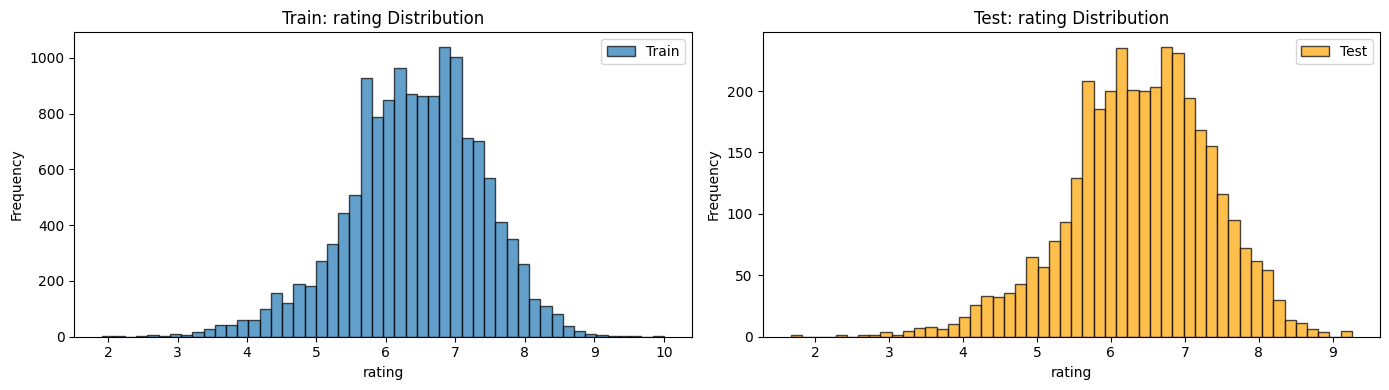

✓ Distributions should look similar


In [32]:
col_to_check = numeric_cols[2]  # First Imputed Column

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Train distribution
axes[0].hist(train_df[col_to_check], bins=50, alpha=0.7, label='Train', edgecolor='black')
axes[0].set_xlabel(col_to_check)
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Train: {col_to_check} Distribution')
axes[0].legend()

# Test distribution
axes[1].hist(test_df[col_to_check], bins=50, alpha=0.7, label='Test', color='orange', edgecolor='black')
axes[1].set_xlabel(col_to_check)
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Test: {col_to_check} Distribution')
axes[1].legend()

plt.tight_layout()
plt.show()

print("✓ Distributions should look similar")

### Saving the imputed dataset, for visualization purposes

In [33]:
## Saving the numerical imputed dataset
def save_imputed_dataset(train_df, test_df, path="../data/processed/cleaned_imputed_anime.csv"):
    full_df = pd.concat([
        train_df.assign(dataset="train"),
        test_df.assign(dataset="test")
    ], ignore_index=True)

    full_df.to_csv(path, index=False)

save_imputed_dataset(train_df=train_df, test_df=test_df)

    

### Encoding Category variables

In [34]:
print("[TRAIN] Set Categorical missing value check\n")
print(train_df.select_dtypes(include='category').isnull().sum())

print("\n[TEST] Set Categorical missing value check\n")
print(test_df.select_dtypes(include='category').isnull().sum())


[TRAIN] Set Categorical missing value check

name            0
genre           0
type            0
themes          0
demographics    0
producers       0
studios         0
source          0
dtype: int64

[TEST] Set Categorical missing value check

name            0
genre           0
type            0
themes          0
demographics    0
producers       0
studios         0
source          0
dtype: int64


## Observations

- themes & genre would have more than 3625 because each row has multiple tags

### Categorical Encoding Strategy for Anime Rating Prediction

##### Your 8 Categorical Columns (with Cardinality)

| Column | Unique Values | Encoding Type | Why This Encoding? |
|--------|---------------|--------------|-------------------|
| **name** | 12,293 | **Drop/Ignore** | Extremely high cardinality - nearly unique per row. No predictive value as each anime name is unique. Encoding would cause severe overfitting and memory issues. |
| **genre** | 3,265 | **Multi-Label Binarization (Top 15-20)** | Very high cardinality but contains **multiple values per row** (comma-separated). Most combinations are rare. Selecting top 15-20 individual genres captures 95%+ of genre information. Genres are the strongest predictor of rating preferences. |
| **type** | 7 | **One-Hot Encoding** | Very low cardinality (TV, Movie, OVA, Special, ONA, Music, Unknown). Perfect for standard one-hot encoding. Creates only 6 columns (drop first). Type significantly affects rating patterns. |
| **themes** | 929 | **Multi-Label Binarization (Top 15-20)** | High cardinality with **multiple values per row**. Like genres, most are rare combinations. Top 15-20 themes capture most variance. Themes strongly predict niche audience preferences and rating behaviors. |
| **demographics** | 8 | **One-Hot Encoding** | Very low cardinality (Shounen, Seinen, Josei, Shoujo, Kids, + NaN/missing). Can use simple one-hot encoding (creates 7 columns). Small enough that target encoding is overkill. Demographics have distinct rating distributions. |
| **producers** | 4,739 | **Target Encoding + Frequency** | Extremely high cardinality - one-hot would create 4,739 columns! Target encoding essential. Many producers appear rarely. Top producers (Aniplex, Bandai) consistently make higher-rated content. Smoothing handles rare producers. Frequency separates major vs indie producers. |
| **studios** | 1,478 | **Target Encoding + Frequency** | Very high cardinality - one-hot impossible. Studio reputation is highly predictive (e.g., Kyoto Animation, MAPPA, Bones vs unknown studios). Target encoding captures quality differences. Frequency indicates studio experience and output volume. |
| **source** | 17 | **One-Hot Encoding** OR **Target Encoding** | Low-moderate cardinality (Manga, Original, Light Novel, Game, Visual Novel, 4-koma, Book, Web manga, etc.). Can use either approach. **Recommendation: One-hot** (creates 16 columns) for simplicity since cardinality is manageable. Source type affects rating patterns. |

### Encoding Summary by Strategy

#### 1. Drop (1 column)
- **name**: No predictive value, unique per row

#### 2. One-Hot Encoding (creates ~5 columns)
- **type**: Low cardinality categorical

#### 3. Multi-Label Binarization (creates ~30 columns)
- **genre** (top 15 genres): ~15 binary columns
- **themes** (top 15 themes): ~15 binary columns
- *Captures multiple values per anime, handles high diversity*

#### 4. Target Encoding + Frequency (creates 8 columns)
- **studios**: 2 columns (target_enc + freq)
- **producers**: 2 columns (target_enc + freq)  
- **source**: 2 columns (target_enc + freq)
- **demographics**: 2 columns (target_enc + freq)
- *Handles high cardinality while preventing dimensionality explosion*

**Total Encoded Features**: ~65 columns

### Decision Rules by Cardinality

#### Cardinality < 20: One-Hot Encoding ✓
- **type** (7 unique) → 6 columns
- **demographics** (8 unique) → 7 columns  
- **source** (17 unique) → 16 columns

#### Cardinality 100-5,000 + Multi-value: Multi-Label Binarization ✓
- **genre** (3,265 unique combinations) → Top 15-20 = 20 columns
- **themes** (929 unique combinations) → Top 15-20 = 20 columns

#### Cardinality > 1,000: Target Encoding + Frequency ✓
- **studios** (1,478 unique) → 2 columns (target_enc + freq)
- **producers** (4,739 unique) → 2 columns (target_enc + freq)

#### Nearly Unique: Drop ✗
- **name** (12,293 unique) → Dropped

### Key Insight: Multi-value Fields

**Important**: `genre` and `themes` likely have even MORE unique values because they're **comma-separated lists**. The 3,265 and 929 represent unique *combinations*, not individual genres/themes. That's why:
- Multi-label binarization is essential (not target encoding)
- We select only the top 15-20 individual genres/themes
- This captures the most common patterns without explosion

### Key Principles Used

1. **High cardinality + predictive relationship** → Target Encoding
2. **Multi-value fields** → Multi-Label Binarization
3. **Low cardinality** → One-Hot Encoding
4. **Already numerical** → Keep as-is
5. **Unique identifiers** → Drop


### One-Hot Encoding

- type
- demographics
- source

In [35]:
train_df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members',
       'themes', 'demographics', 'producers', 'studios', 'source',
       'duration(mins)', 'popularity', 'favorites'],
      dtype='object')

In [36]:
train_df.drop(columns=['name'], inplace=True)
test_df.drop(columns=['name'], inplace=True)

In [37]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(train_df, test_df, cols):
    train_copy = train_df.copy()
    test_copy = test_df.copy()
    
    encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
    encoder.fit(train_copy[cols])
    
    train_encoded = encoder.transform(train_copy[cols])
    test_encoded = encoder.transform(test_copy[cols])
    
    # Convert to DataFrame with integer columns
    encoded_columns = encoder.get_feature_names_out(cols)
    train_encoded_df = pd.DataFrame(train_encoded.astype(int), columns=encoded_columns, index=train_copy.index)
    test_encoded_df = pd.DataFrame(test_encoded.astype(int), columns=encoded_columns, index=test_copy.index)
    
    # Drop original categorical columns and concat encoded columns
    train_copy = pd.concat([train_copy.drop(columns=cols), train_encoded_df], axis=1)
    test_copy = pd.concat([test_copy.drop(columns=cols), test_encoded_df], axis=1)
    
    
        
    return train_copy, test_copy

train_df, test_df = one_hot_encode(train_df, test_df, ['type', 'demographics', 'source'])

Checking if the columns of train_df, test_df are equal.

In [38]:
### Check equivilance
equivalance = train_df.columns.equals(test_df.columns)
print(equivalance)

True


### Mult-Label Binarization

- genres
- themes

In [39]:
from sklearn.preprocessing import MultiLabelBinarizer
import itertools
from collections import Counter
import pandas as pd

def encode_multilabel_top_n(train_series, test_series, colname, top_n=20):
    """
    Multi-label binarization with train-test consistency and top-N filtering.
    """
    # Convert to lists and replace missing with ['Unknown']
    def to_list(x):
        if pd.isna(x):
            return ['Unknown']
        if isinstance(x, list):
            return x
        if isinstance(x, str):
            return x.split(', ')
        return ['Unknown']

    train_list = train_series.apply(to_list)
    test_list  = test_series.apply(to_list)

    # Get label counts from TRAIN ONLY
    all_labels = list(itertools.chain.from_iterable(train_list))
    label_counts = Counter(all_labels)

    # Select top N labels
    top_labels = set([label for label,_ in label_counts.most_common(top_n)])

    # Filter labels
    train_filtered = train_list.apply(lambda x: [lbl for lbl in x if lbl in top_labels])
    test_filtered  = test_list.apply(lambda x: [lbl for lbl in x if lbl in top_labels])

    # Fit MultiLabelBinarizer ONLY on train top-N labels
    mlb = MultiLabelBinarizer(classes=sorted(top_labels))
    mlb.fit(train_filtered)

    # Transform both
    train_encoded = mlb.transform(train_filtered)
    test_encoded  = mlb.transform(test_filtered)

    # Convert to DataFrames
    cols = [f"{colname}_{c}" for c in mlb.classes_]

    train_df_encoded = pd.DataFrame(train_encoded, columns=cols, index=train_series.index)
    test_df_encoded  = pd.DataFrame(test_encoded,  columns=cols, index=test_series.index)

    return train_df_encoded, test_df_encoded, mlb, label_counts


# Fix category dtypes (required)
for col in ["genre", "themes"]:
    train_df[col] = train_df[col].astype(str)
    test_df[col] = test_df[col].astype(str)

# Encode multi-label features
genre_train, genre_test, _, _ = encode_multilabel_top_n(
    train_df["genre"], test_df["genre"], "genre", top_n=20
)

theme_train, theme_test, _, _ = encode_multilabel_top_n(
    train_df["themes"], test_df["themes"], "themes", top_n=20
)

# Add encoded columns to your dataframes
train_df = pd.concat([train_df.drop(columns=["genre", "themes"]), genre_train, theme_train], axis=1)
test_df  = pd.concat([test_df.drop(columns=["genre", "themes"]), genre_test, theme_test], axis=1)


In [40]:
## Check equivalence
equivalance = train_df.columns.equals(test_df.columns)
print(equivalance)

True


### Target Encoding + Frequency Encoding

- studios
- producers

- **What it does:** Converts categorical features (even multi-label lists) into **numeric features** using the target variable.  
  1. **Target Encoding:** Average target value per category  
  2. **Frequency Encoding:** How often the category appears in the training set  

- **Example:** `studios` column with high cardinality

| row studios             | Target Encoding (rating) | Frequency Encoding |
|-------------------------|-------------------------|------------------|
| ['Studio Ghibli','Disney'] | (8.4 + 7.6)/2 = 8.0   | (50 + 30)/2 = 40 |

- **When to use:**  
  - High-cardinality categorical features (thousands of unique values)  
  - You want a **compact representation** that captures predictive power  
- **Benefits:**  
  - Reduces number of features → memory efficient  
  - Avoids one-hot sparsity  
  - Maintains train-test consistency when done correctly  

In [41]:
import pandas as pd

def encode_multilabel_target_freq(train_df, test_df, column, target):

    train = train_df.copy()
    test = test_df.copy()

    # Convert values to list form
    def to_list(x):
        if isinstance(x, list):
            return x
        if isinstance(x, str):
            return x.split(", ")
        return ["Unknown"]  # represents missing, NaN, or unexpected format

    train_list = train[column].apply(to_list)
    test_list  = test[column].apply(to_list)

    # Expand train only
    exploded = pd.DataFrame({
        column: train_list,
        target: train[target]
    }).explode(column)

    exploded[column] = exploded[column].fillna("Unknown")

    # Global mean (used for unseen labels in test)
    global_mean = train[target].mean()

    # Frequency encoding
    freq_map = exploded[column].value_counts().to_dict()

    def compute_freq(values):
        return sum(freq_map.get(v, 0) for v in values) / len(values)

    # Target encoding
    target_map = exploded.groupby(column)[target].mean().to_dict()

    def compute_target(values):
        return sum(target_map.get(v, global_mean) for v in values) / len(values)

    # Assign back
    train[f"{column}_freq"] = train_list.apply(compute_freq)
    test[f"{column}_freq"]  = test_list.apply(compute_freq)

    train[f"{column}_target_enc"] = train_list.apply(compute_target)
    test[f"{column}_target_enc"]  = test_list.apply(compute_target)

    return train, test, target_map, freq_map

for col in ["studios", "producers"]:
    train_df[col] = train_df[col].astype(str)
    test_df[col] = test_df[col].astype(str)

train_df, test_df, studios_target_map, studios_freq_map = encode_multilabel_target_freq(
    train_df, test_df, column="studios", target="rating"
)

train_df, test_df, producers_target_map, producers_freq_map = encode_multilabel_target_freq(
    train_df, test_df, column="producers", target="rating"
)


In [42]:
equivalance = train_df.columns.equals(test_df.columns)
print(equivalance)

True


In [43]:
import re

for df in [train_df, test_df]:
    df.columns = [re.sub(r'[ ,]+', '_', c) for c in df.columns]


In [44]:
train_df.columns

Index(['anime_id', 'episodes', 'rating', 'members', 'producers', 'studios',
       'duration(mins)', 'popularity', 'favorites', 'type_Movie', 'type_Music',
       'type_ONA', 'type_OVA', 'type_Special', 'type_TV', 'type_Unknown',
       'demographics_Josei', 'demographics_Kids', 'demographics_Kids_Shoujo',
       'demographics_Kids_Shounen', 'demographics_Seinen',
       'demographics_Shoujo', 'demographics_Shounen', 'demographics_Unknown',
       'source_4-koma_manga', 'source_Book', 'source_Card_game', 'source_Game',
       'source_Light_novel', 'source_Manga', 'source_Mixed_media',
       'source_Music', 'source_Novel', 'source_Original', 'source_Other',
       'source_Picture_book', 'source_Radio', 'source_Unknown',
       'source_Visual_novel', 'source_Web_manga', 'source_Web_novel',
       'genre_Action', 'genre_Adventure', 'genre_Comedy', 'genre_Drama',
       'genre_Ecchi', 'genre_Fantasy', 'genre_Hentai', 'genre_Historical',
       'genre_Kids', 'genre_Magic', 'genre_Mecha', '

In [45]:
train_df.drop(columns=['studios', 'producers'], inplace=True) # removing original categorical variables
test_df.drop(columns=['studios', 'producers'], inplace=True)

In [46]:
print(train_df.columns.equals(test_df.columns))

True


In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14151 entries, 7682 to 15795
Data columns (total 83 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   anime_id                   14151 non-null  float64
 1   episodes                   14151 non-null  float64
 2   rating                     14151 non-null  float64
 3   members                    14151 non-null  float64
 4   duration(mins)             14151 non-null  float64
 5   popularity                 14151 non-null  float64
 6   favorites                  14151 non-null  float64
 7   type_Movie                 14151 non-null  int64  
 8   type_Music                 14151 non-null  int64  
 9   type_ONA                   14151 non-null  int64  
 10  type_OVA                   14151 non-null  int64  
 11  type_Special               14151 non-null  int64  
 12  type_TV                    14151 non-null  int64  
 13  type_Unknown               14151 non-null  int64

In [48]:
### Write the separate files for both testing and training
train_df.to_parquet("../data/splits/train.parquet", index=False)
test_df.to_parquet("../data/splits/test.parquet", index=False)